<img src="../images/logo_VORTEX.png" width="200" height="auto" alt="Company Logo">

| Project| Authors           | Company                                 | Year | Chapter |
|--------|-------------------|-----------------------------------------|------|---------|
| Pywind | Albert Bosch | [Vortex FdC](https://www.vortexfdc.com) | 2025 | 6       |
|        |     Oriol L   | | | |         

# Chapter 6: Atmospheric Stability Classification ( The Ri method )

_Overview_

We are generating a classification of atmosphere stability by using the Richardson Number. We use a time series and compute the instant
Richardson number. We stablish a classificatoin method based on the range of the values. Some plots are then shown.



_Specifically, we will:_

- Define Stablity
- Define & compute Richardson number given two heights in the dataset.
- Compute and plot stablity classes for different segmentations:
  - months
  - hours
  - Directions



_What you'll learn_

You will learn how Richardson number is computed and to define a classification based on it. 
You'll also check how the stability depends on different parameters.
You can tune up the parameters to comnpare against but also select different heights for the Richardson number computation.

### Atmospheric Stability

define 

### Classification

atmospheric_stability_edges_rmol = [-1 / 100, -1 / 200, -1 / 500,
                                    1 / 500, 1 / 200, 1 / 50]
atmospheric_stability_classes = \<br /> 
| 'Very Unstable' |  'Unstable' | 'Near-neutral Unstable' | 'Neutral' | 'Near-neutral Stable' |  'Stable' | 'Very Stable' |

### Richardson Number

deine

### Import Libraries


########################## Vortex F.d.C. 2025 ##########################

Levels in Vortex dataset:
[  8.  28.  52.  80. 111. 145. 182. 220. 263. 330.]
Select two levels for which to compute the stability classification:
Selected levels:
[ 52. 145.]
<xarray.Dataset> Size: 6MB
Dimensions:  (lev: 2, time: 176424, lat: 1, lon: 1)
Coordinates:
  * lon      (lon) float32 4B 8.342
  * lat      (lat) float32 4B 63.67
  * lev      (lev) float32 8B 52.0 145.0
  * time     (time) datetime64[ns] 1MB 2004-01-01 ... 2024-02-15T23:00:00
Data variables:
    M        (lev, time, lat, lon) float32 1MB ...
    Dir      (lev, time, lat, lon) float32 1MB ...
    T        (lev, time, lat, lon) float32 1MB ...
Attributes:
    Reanalysis:            ERA5
    Origin:                VORTEX SL
    Product:               SERIES
    HorizontalResolution:  3km
    Produced:              2024-04-11 11:09:26
    WorkID:                1235817
    history:               Vortex processed time serie from era5-wrf down

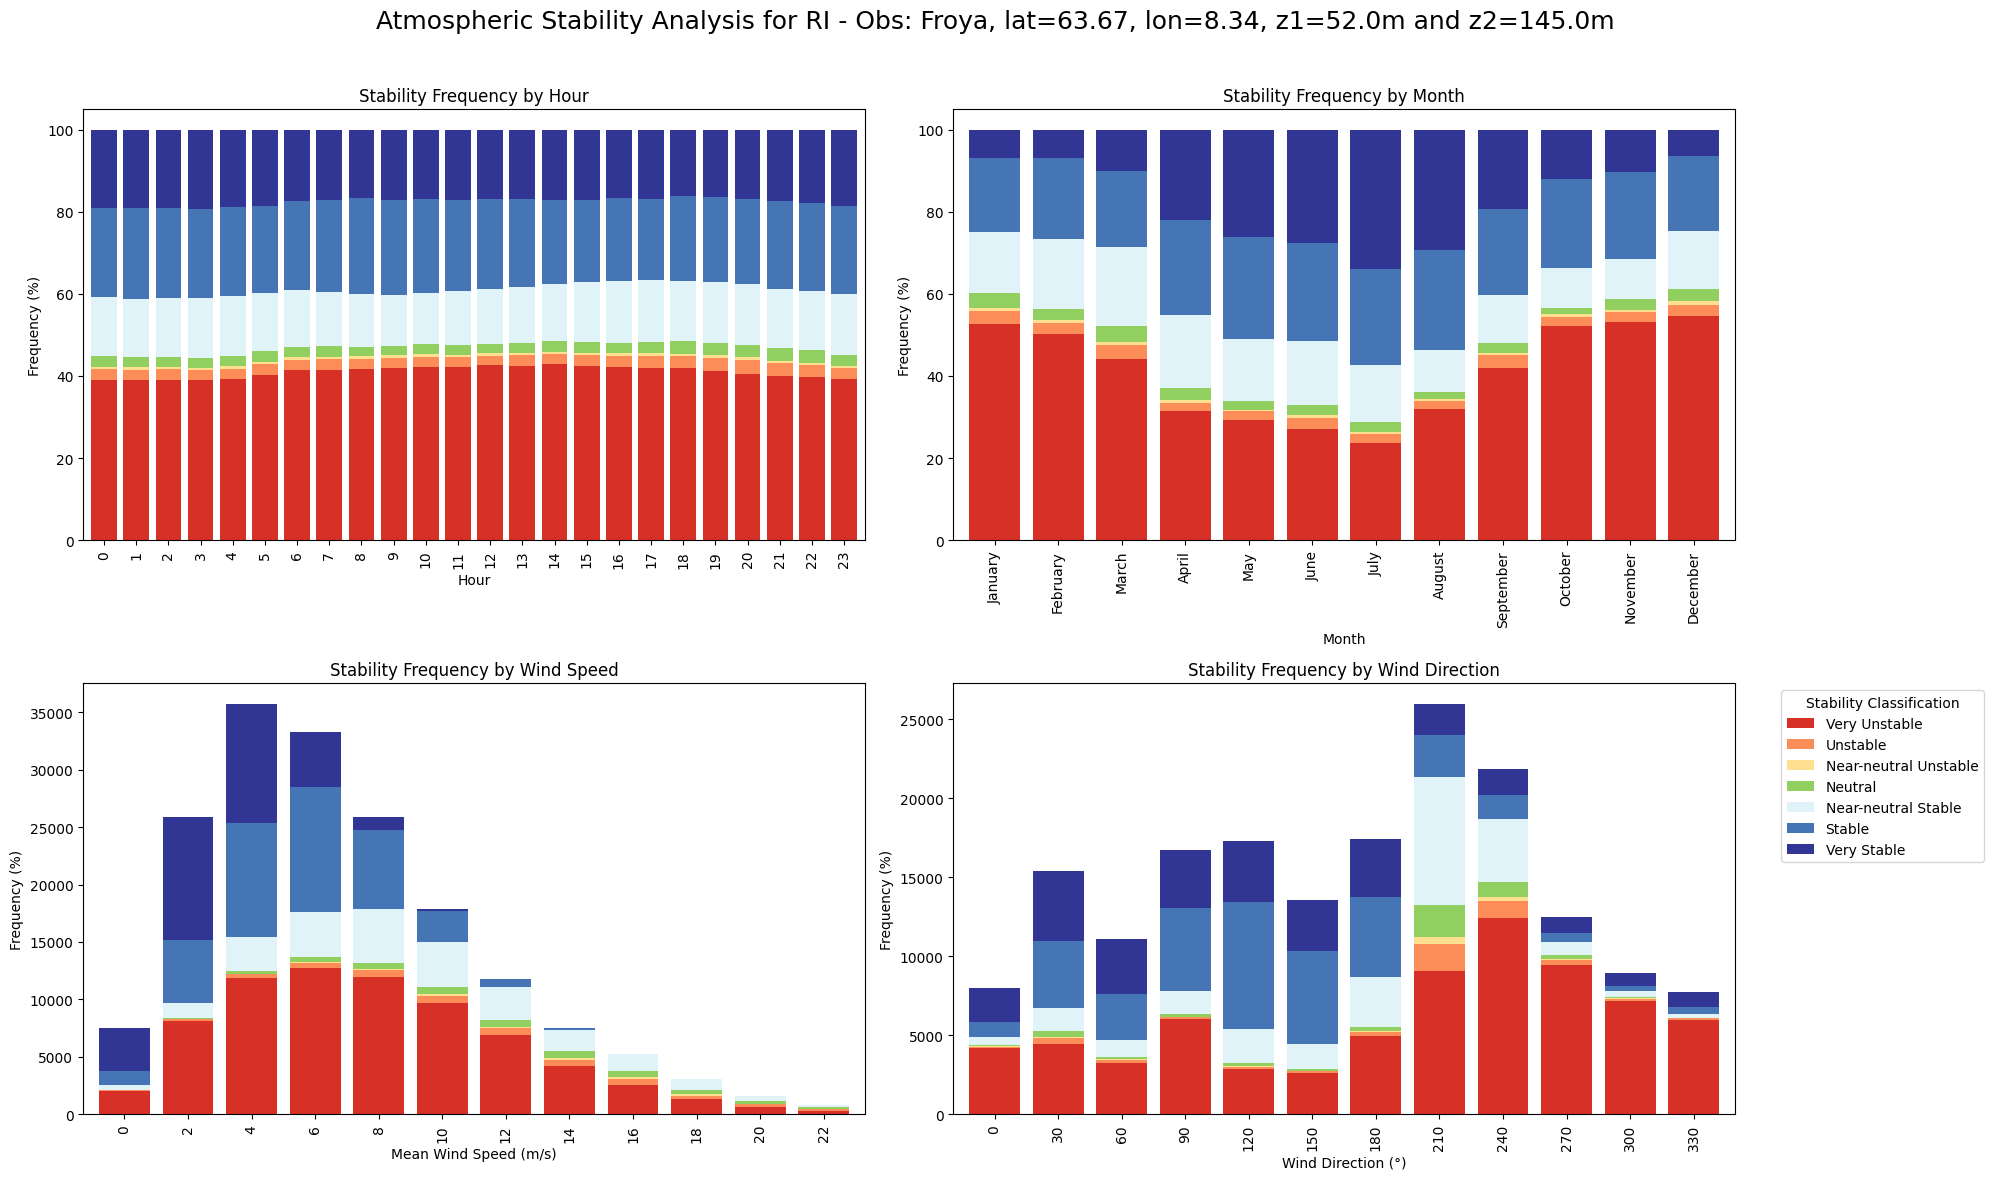

Plot saved successfully to output/Froya_RI_stability_frequency.png


In [2]:
# =============================================================================
# Authors: Oriol L 
# Company: Vortex F.d.C.
# Year: 2025
# =============================================================================

"""
Overview:
---------
This script demonstrates the process of plotting basic information once a dataset from both measurements and synthetic data has been merged.

"""
# =============================================================================
# 1. Import Libraries
# =============================================================================
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '../examples'))
from example_2_read_txt_functions import *
from example_6_AtmosphericStabilityClassification_functions import build_ds_stability, plot_stability_frequency
import os



# =============================================================================
# 2. Define Paths and Site
#  Repeat the process in chapter 3 to read netcdf and merge datasets
# =============================================================================

SITE = 'froya'
pwd = os.getcwd()
base_path = str(os.path.join(pwd, '../data'))

vortex_netcdf = os.path.join(base_path, f'{SITE}/vortex/SERIE/vortex.serie.era5.utc0.nc')

print()
print('#'*26, 'Vortex F.d.C. 2025', '#'*26)
print()

# Read Text Series

ds_vortex = xr.open_dataset(vortex_netcdf)

ds_vortex = ds_vortex[['M','Dir','T']]

print("Levels in Vortex dataset:")
print(ds_vortex['lev'].values)

print("Select two levels for which to compute the stability classification:")
ds_vortex = ds_vortex.isel(lev=[2, 5])
print("Selected levels:")
print(ds_vortex['lev'].values)

print(ds_vortex)

# Calcular z1 i z2
z1, z2 = ds_vortex['lev'].values
print(f'Levels for stability analysis: z1={z1}, z2={z2}')
ds_obs_stability = build_ds_stability(ds_vortex,z1, z2)

site = "Froya"
lat = str(round(ds_vortex['lat'].values[0], 2))
lon = str(round(ds_vortex['lon'].values[0], 2))
output_dir = "output"
# Plot stability frequency
title = f'Obs: {site}, lat={lat}, lon={lon}, z1={z1}m and z2={z2}m'
print(f'Plotting stability frequency for {site} with levels z1={z1} and z2={z2}')
plot_stability_frequency(ds_obs_stability, site, output_dir, plot_types='all', title=title)









### Thank you for completing this Notebook! 
### *Other references available upon request.*

Remember, you can tune up to:

- Check for the different variables computation functions.
- Change the variables (hours, months, etc) in categorization for Stability classificatoin.
- Combine different heights.
- Explore other time series you might have.


**Don't hesitate to [contact us](https://vortexfdc.com/contact/) for any questions and information.**

## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description                         |
|-------------------|---------|------------|--------------------------------------------|
| 2025-06-20        | 0.9     | Oriol L    | Notebook creation                          |

<hr>

## <h3 align="center"> © Vortex F.d.C. 2025. All rights reserved. <h3/>